# **Cantoría Evaluation - Holdout**

Developed by André Paiva

Based on Cantoría Dataset and papers by Helena Cuesta and Emilia Gómez

In [51]:
import sys
import numpy as np
import pandas as pd
import va_plots
import cantoria_utils

np.set_printoptions(threshold=sys.maxsize)

In [52]:
mix_df, sop_df, alto_df, ten_df, bass_df = cantoria_utils.cantoria_metrics(5)
model_name = 'VoasCNN (Original)'

1/1 [==============================] - 0s 14ms/step


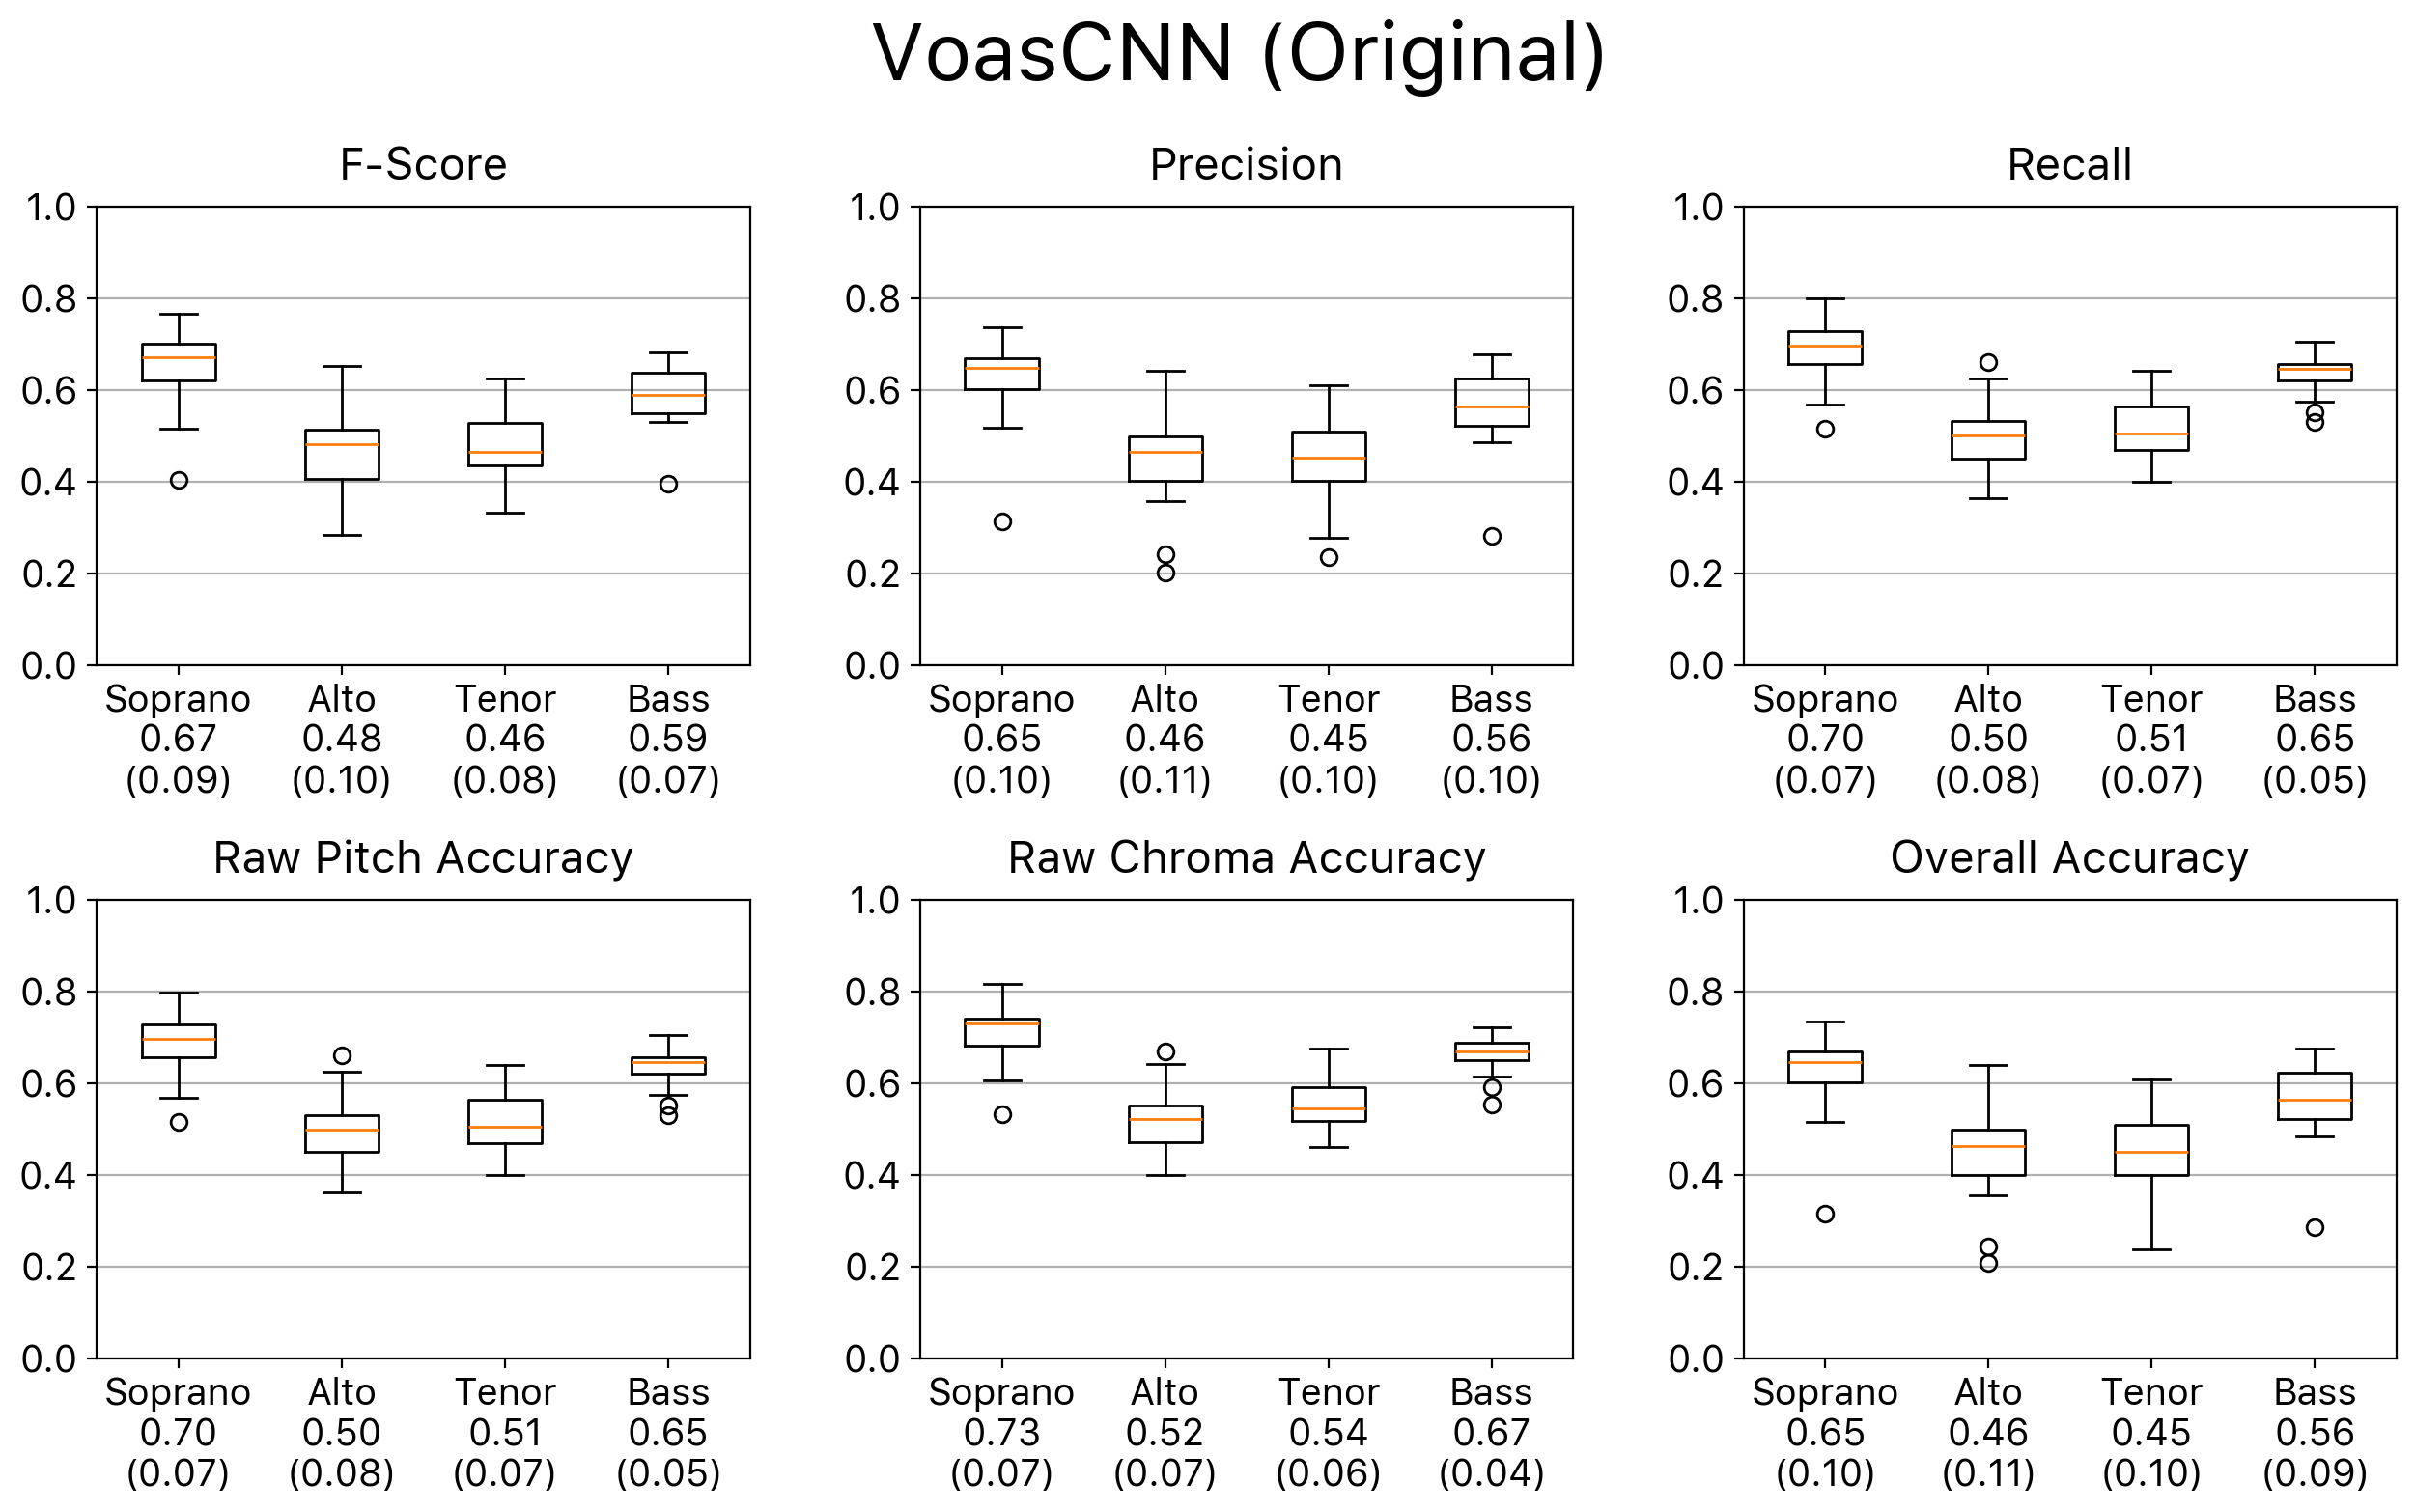

In [53]:
va_plots.evaluation_boxplots(sop_df, alto_df, ten_df, bass_df, model_name)

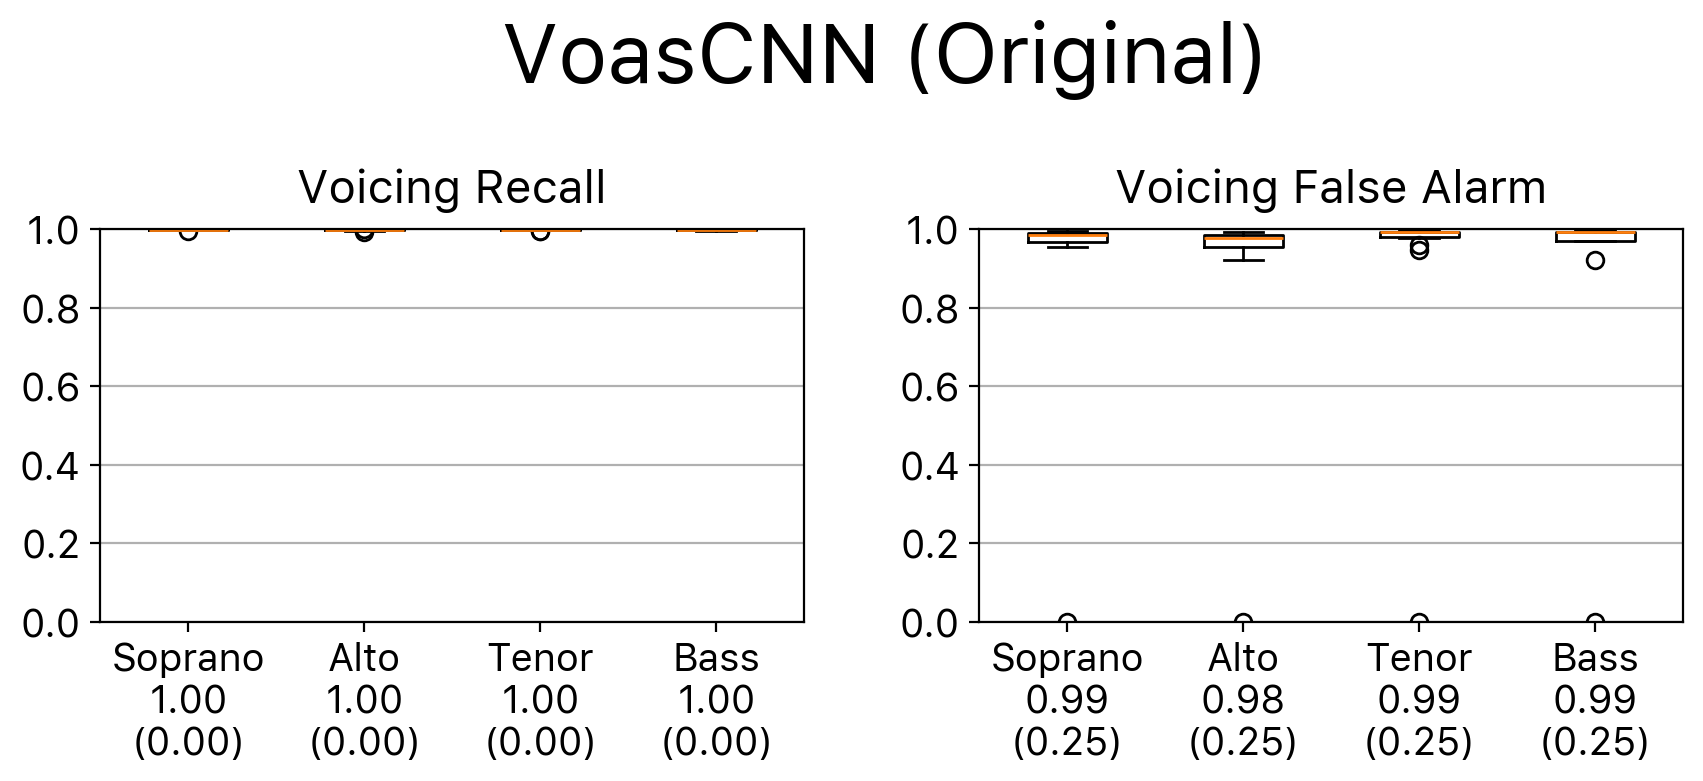

In [54]:
va_plots.voicing_boxplots(sop_df, alto_df, ten_df, bass_df, model_name)

In [55]:
print(mix_df['Precision'].median(), mix_df['Precision'].std())
print(mix_df['Recall'].median(), mix_df['Recall'].std())
print(mix_df['Accuracy'].median(), mix_df['Accuracy'].std())
print(mix_df['F-Measure'].median(), mix_df['F-Measure'].std())

0.613851667463849 0.09222556618522733
0.6792374947149126 0.047414958119770104
0.47090972104834766 0.06912963077837865
0.6402742917987083 0.06818593927741434


In [56]:
sop_hcb = sop_df[['Raw Pitch Accuracy', 'Overall Accuracy', 'Precision', 'Recall', 'Accuracy', 'F-Measure']].loc[['HCB']]
alto_hcb = alto_df[['Raw Pitch Accuracy', 'Overall Accuracy', 'Precision', 'Recall', 'Accuracy', 'F-Measure']].loc[['HCB']]
ten_hcb = ten_df[['Raw Pitch Accuracy', 'Overall Accuracy', 'Precision', 'Recall', 'Accuracy', 'F-Measure']].loc[['HCB']]
bass_hcb = bass_df[['Raw Pitch Accuracy', 'Overall Accuracy', 'Precision', 'Recall', 'Accuracy', 'F-Measure']].loc[['HCB']]

hcb_metrics = pd.concat([sop_hcb, alto_hcb, ten_hcb, bass_hcb])
hcb_metrics.insert(0, 'Voice', ['Soprano', 'Alto', 'Tenor', 'Bass'])
hcb_metrics = hcb_metrics.set_index('Voice')
hcb_metrics

,Raw Pitch Accuracy,Overall Accuracy,Precision,Recall,Accuracy,F-Measure
Voice,,,,,,
Soprano,0.707492,0.663047,0.663671,0.707492,0.520776,0.684882
Alto,0.501891,0.470457,0.469604,0.501891,0.320316,0.485211
Tenor,0.641000,0.609071,0.609114,0.641000,0.454176,0.624650
Bass,0.650750,0.611306,0.611735,0.650750,0.460536,0.630640


In [57]:
sop_df

,Precision,Recall,Accuracy,Substitution Error,Miss Error,False Alarm Error,Total Error,Chroma Precision,Chroma Recall,Chroma Accuracy,Chroma Substitution Error,Chroma Miss Error,Chroma False Alarm Error,Chroma Total Error,F-Measure,Voicing Recall,Voicing False Alarm,Raw Pitch Accuracy,Raw Chroma Accuracy,Overall Accuracy
Songname,,,,,,,,,,,,,,,,,,,,
CEA,0.662944,0.689979,0.510792,0.308084,0.001937,0.042716,0.352737,0.698991,0.727495,0.553951,0.270568,0.001937,0.042716,0.315221,0.676191,0.998063,0.990544,0.689979,0.727495,0.661845
EJB1,0.611547,0.661241,0.465656,0.336955,0.001804,0.083064,0.421823,0.640219,0.692243,0.498369,0.305953,0.001804,0.083064,0.390821,0.635424,0.998196,0.989011,0.661241,0.692243,0.610860
EJB2,0.736403,0.798542,0.621027,0.199028,0.002430,0.086812,0.288270,0.752903,0.816435,0.643902,0.181135,0.002430,0.086812,0.270378,0.766214,0.997570,0.965602,0.798542,0.816435,0.735509
HCB,0.663671,0.707492,0.520776,0.290113,0.002395,0.068423,0.360931,0.688062,0.733493,0.550449,0.264112,0.002395,0.068423,0.334930,0.684882,0.997605,0.961538,0.707492,0.733493,0.663047
LBM1,0.581592,0.654494,0.444975,0.344066,0.001440,0.126789,0.472295,0.604079,0.679799,0.470270,0.318761,0.001440,0.126789,0.446990,0.615893,0.998560,0.995546,0.654494,0.679799,0.581060
LBM2,0.633814,0.674944,0.485589,0.323410,0.001646,0.066539,0.391595,0.652452,0.694791,0.507109,0.303562,0.001646,0.066539,0.371747,0.653733,0.998354,0.990470,0.674944,0.694791,0.633056
LJT1,0.599100,0.610995,0.433680,0.387226,0.001780,0.021633,0.410639,0.640051,0.652759,0.477479,0.345462,0.001780,0.021633,0.368875,0.604989,0.998220,0.987365,0.610995,0.652759,0.598166
LJT2,0.689575,0.716363,0.541680,0.281636,0.002001,0.040848,0.324485,0.706006,0.733431,0.561838,0.264567,0.002001,0.040848,0.307416,0.702714,0.997999,0.985795,0.716363,0.733431,0.688425
LNG,0.631689,0.703651,0.498948,0.293947,0.002401,0.116322,0.412670,0.659143,0.734233,0.532173,0.263366,0.002401,0.116322,0.382089,0.665731,0.997599,0.985637,0.703651,0.734233,0.630891


In [58]:
alto_df

,Precision,Recall,Accuracy,Substitution Error,Miss Error,False Alarm Error,Total Error,Chroma Precision,Chroma Recall,Chroma Accuracy,Chroma Substitution Error,Chroma Miss Error,Chroma False Alarm Error,Chroma Total Error,F-Measure,Voicing Recall,Voicing False Alarm,Raw Pitch Accuracy,Raw Chroma Accuracy,Overall Accuracy
Songname,,,,,,,,,,,,,,,,,,,,
CEA,0.516812,0.534144,0.356240,0.463425,0.002432,0.035968,0.501824,0.534163,0.552077,0.372658,0.445491,0.002432,0.035968,0.483891,0.525335,0.997568,0.980663,0.534144,0.552077,0.515930
EJB1,0.457790,0.497195,0.312921,0.500527,0.002277,0.088356,0.591160,0.483885,0.525537,0.336766,0.472186,0.002277,0.088356,0.562819,0.476679,0.997723,0.984492,0.497195,0.525537,0.457525
EJB2,0.580691,0.624917,0.430608,0.372001,0.003082,0.079243,0.454325,0.596646,0.642087,0.447736,0.354832,0.003082,0.079243,0.437156,0.601993,0.996918,0.920716,0.624917,0.642087,0.581678
HCB,0.469604,0.501891,0.320316,0.495015,0.003094,0.071846,0.569955,0.473464,0.506016,0.323801,0.490890,0.003094,0.071846,0.565830,0.485211,0.996906,0.941441,0.501891,0.506016,0.470457
LBM1,0.398518,0.411099,0.253691,0.586861,0.002040,0.033608,0.622509,0.437692,0.451508,0.285754,0.546451,0.002040,0.033608,0.582100,0.404711,0.997960,0.994083,0.411099,0.451508,0.397848
LBM2,0.482151,0.491785,0.321807,0.506156,0.002059,0.022039,0.530255,0.508570,0.518731,0.345533,0.479210,0.002059,0.022039,0.503308,0.486920,0.997941,0.980507,0.491785,0.518731,0.481402
LJT1,0.356378,0.362725,0.219158,0.635301,0.001974,0.019783,0.657058,0.392574,0.399566,0.246913,0.598460,0.001974,0.019783,0.620217,0.359523,0.998026,0.974708,0.362725,0.399566,0.356012
LJT2,0.504877,0.536940,0.351730,0.461130,0.001930,0.065436,0.528496,0.525916,0.559315,0.371838,0.438755,0.001930,0.065436,0.506121,0.520415,0.998070,0.974843,0.536940,0.559315,0.504747
LNG,0.408249,0.522962,0.297471,0.472974,0.004064,0.285052,0.762091,0.426840,0.546777,0.315289,0.449159,0.004064,0.285052,0.738275,0.458540,0.995936,0.994329,0.522962,0.546777,0.407707


In [59]:
ten_df

,Precision,Recall,Accuracy,Substitution Error,Miss Error,False Alarm Error,Total Error,Chroma Precision,Chroma Recall,Chroma Accuracy,Chroma Substitution Error,Chroma Miss Error,Chroma False Alarm Error,Chroma Total Error,F-Measure,Voicing Recall,Voicing False Alarm,Raw Pitch Accuracy,Raw Chroma Accuracy,Overall Accuracy
Songname,,,,,,,,,,,,,,,,,,,,
CEA,0.522761,0.565079,0.372775,0.433968,0.000952,0.081905,0.516825,0.551346,0.595979,0.401340,0.403069,0.000952,0.081905,0.485926,0.543097,0.999048,0.989770,0.565079,0.595979,0.522674
EJB1,0.413462,0.449711,0.274555,0.548855,0.001434,0.089107,0.639396,0.469836,0.511028,0.324123,0.487538,0.001434,0.089107,0.578080,0.430825,0.998566,0.993885,0.449711,0.511028,0.413213
EJB2,0.549817,0.599424,0.402082,0.399025,0.001552,0.091776,0.492352,0.574217,0.626025,0.427555,0.372423,0.001552,0.091776,0.465750,0.573550,0.998448,0.978723,0.599424,0.626025,0.549858
HCB,0.609114,0.641000,0.454176,0.356974,0.002026,0.054374,0.413374,0.642490,0.676123,0.491288,0.321851,0.002026,0.054374,0.378251,0.624650,0.997974,0.947059,0.641000,0.676123,0.609071
LBM1,0.432885,0.462922,0.288162,0.536000,0.001078,0.070466,0.607544,0.478158,0.511337,0.328190,0.487585,0.001078,0.070466,0.559130,0.447400,0.998922,0.991832,0.462922,0.511337,0.432757
LBM2,0.467619,0.493233,0.315863,0.505591,0.001177,0.055950,0.562718,0.508261,0.536101,0.353006,0.462722,0.001177,0.055950,0.519850,0.480085,0.998823,0.992771,0.493233,0.536101,0.467304
LJT1,0.378595,0.400320,0.241584,0.598328,0.001353,0.058734,0.658415,0.435111,0.460079,0.288035,0.538569,0.001353,0.058734,0.598656,0.389154,0.998647,0.994448,0.400320,0.460079,0.378304
LJT2,0.465145,0.488086,0.312628,0.510131,0.001783,0.051102,0.563016,0.518489,0.544061,0.361440,0.454157,0.001783,0.051102,0.507041,0.476340,0.998217,0.994220,0.488086,0.544061,0.464508
LNG,0.396643,0.527144,0.292554,0.470331,0.002525,0.331538,0.804394,0.427296,0.567881,0.322453,0.429593,0.002525,0.331538,0.763656,0.452676,0.997475,0.997468,0.527144,0.567881,0.396273


In [60]:
bass_df

,Precision,Recall,Accuracy,Substitution Error,Miss Error,False Alarm Error,Total Error,Chroma Precision,Chroma Recall,Chroma Accuracy,Chroma Substitution Error,Chroma Miss Error,Chroma False Alarm Error,Chroma Total Error,F-Measure,Voicing Recall,Voicing False Alarm,Raw Pitch Accuracy,Raw Chroma Accuracy,Overall Accuracy
Songname,,,,,,,,,,,,,,,,,,,,
CEA,0.554860,0.574309,0.393162,0.424476,0.001216,0.036268,0.461959,0.593129,0.613920,0.431993,0.384865,0.001216,0.036268,0.422348,0.564417,0.998784,0.991690,0.574309,0.613920,0.554339
EJB1,0.518125,0.657871,0.408148,0.341390,0.000738,0.270454,0.612582,0.550343,0.698779,0.444817,0.300482,0.000738,0.270454,0.571675,0.579695,0.999262,0.994389,0.657871,0.698779,0.518402
EJB2,0.661359,0.704348,0.517655,0.293696,0.001957,0.066957,0.362609,0.678302,0.722391,0.538051,0.275652,0.001957,0.066957,0.344565,0.682177,0.998043,0.922156,0.704348,0.722391,0.661938
HCB,0.611735,0.650750,0.460536,0.347203,0.002046,0.065825,0.415075,0.642193,0.683151,0.494812,0.314802,0.002046,0.065825,0.382674,0.630640,0.997954,0.969849,0.650750,0.683151,0.611306
LBM1,0.573172,0.624784,0.426397,0.374203,0.001014,0.091059,0.466275,0.601612,0.655784,0.457228,0.343202,0.001014,0.091059,0.435275,0.597866,0.998986,0.997225,0.624784,0.655784,0.572739
LBM2,0.628169,0.651219,0.470033,0.347803,0.000978,0.037671,0.386453,0.648719,0.672523,0.492990,0.326499,0.000978,0.037671,0.365149,0.639486,0.999022,0.994131,0.651219,0.672523,0.627657
LJT1,0.512206,0.550631,0.361214,0.448411,0.000958,0.075978,0.525347,0.550023,0.591286,0.398512,0.407756,0.000958,0.075978,0.484692,0.530724,0.999042,0.995633,0.550631,0.591286,0.511901
LJT2,0.529951,0.641755,0.408966,0.357491,0.000754,0.211724,0.569969,0.551013,0.667261,0.432245,0.331985,0.000754,0.211724,0.544463,0.580519,0.999246,0.993245,0.641755,0.667261,0.530180
LNG,0.485303,0.618621,0.373543,0.378876,0.002503,0.277213,0.658592,0.509755,0.649790,0.399891,0.347707,0.002503,0.277213,0.627422,0.543912,0.997497,0.996228,0.618621,0.649790,0.484776
